In [104]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
os.chdir(r'C:\Users\shubham\Desktop\case_study_python\13 Model Selection and Boosting')

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [76]:
dataset = pd.read_csv('letterCG.csv',sep = ' ',header = None)

In [77]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
2,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
3,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
4,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1506,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1507,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1508,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6


In [78]:
dataset.columns = dataset.iloc[0]

In [79]:
dataset=dataset.drop(dataset.index[0])

In [80]:
dataset.columns = dataset.columns.str.strip()


In [81]:
dataset

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
2,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
3,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
4,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
5,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1506,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1507,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1508,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6


In [82]:
x=dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [83]:
x

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
2,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
3,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
4,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
5,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1506,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1507,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1508,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6


In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))


In [88]:
train_x, test_x, train_y, test_y = train_test_split(x, binary_encoded_y, random_state=0)

In [89]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_x, train_y)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [91]:
predictions = classifier.predict(test_x)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predictions)

array([[154,  12],
       [  6, 206]], dtype=int64)

In [95]:
print(metrics.accuracy_score(test_y,predictions))

0.9523809523809523


In [96]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200
)
classifier.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200)

In [97]:
predictions = classifier.predict(test_x)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predictions)

array([[165,   1],
       [  2, 210]], dtype=int64)

In [100]:
print(metrics.accuracy_score(test_y,predictions))

0.9920634920634921


>10 0.906 (0.032)
>50 0.950 (0.015)
>100 0.961 (0.012)
>500 0.964 (0.010)
>1000 0.962 (0.010)
>5000 0.960 (0.011)


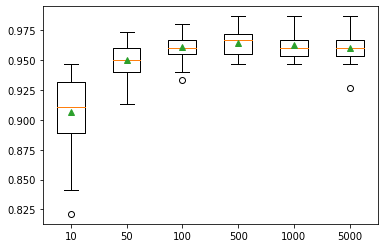

In [108]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = AdaBoostClassifier(n_estimators=10)
	models['50'] = AdaBoostClassifier(n_estimators=50)
	models['100'] = AdaBoostClassifier(n_estimators=100)
	models['500'] = AdaBoostClassifier(n_estimators=500)
	models['1000'] = AdaBoostClassifier(n_estimators=1000)
	models['5000'] = AdaBoostClassifier(n_estimators=5000)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.906 (0.032)
>50 0.950 (0.015)
>100 0.961 (0.012)
>200 0.964 (0.010)
>300 0.962 (0.010)


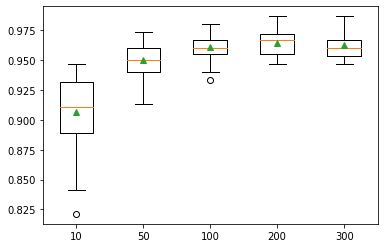

In [109]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['10'] = AdaBoostClassifier(n_estimators=10)
	models['50'] = AdaBoostClassifier(n_estimators=50)
	models['100'] = AdaBoostClassifier(n_estimators=100)
	models['200'] = AdaBoostClassifier(n_estimators=500)
	models['300'] = AdaBoostClassifier(n_estimators=1000)
#	models['5000'] = AdaBoostClassifier(n_estimators=5000)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()